# IFFT calculation using FFT function

Install dependencies

In [1]:
!pip install numpy matplotlib

Import dependencies

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Generate a signal

In [3]:
A = 10                                                                                                                                                                           
fs = 200 
N = 1024 
spectral_resolution = fs / N 
f = 10 * spectral_resolution
print(f"Amplitude = {A}, f = {f:.2f}Hz, sampling frequency = {fs}Hz, N = {N}, spectral resolution = {spectral_resolution}Hz")
t = np.arange(0, N) / fs 
x = A * np.sin(2 * np.pi * f * t)

Amplitude = 10, f = 1.95Hz, sampling frequency = 200Hz, N = 1024, spectral resolution = 0.1953125Hz


Calculate FFT

In [4]:
X = np.fft.fft(x, N)

Calculate IFFT using FFT (first method)

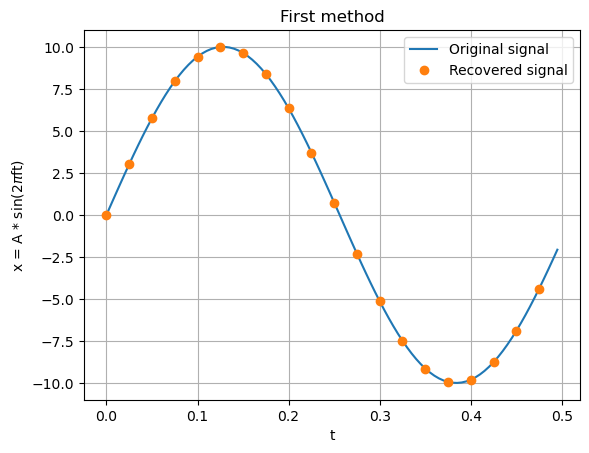

In [5]:
x_hat = np.conj(np.fft.fft(np.conj(X))) / N
x_hat = np.real(x_hat)
plt.figure()
plt.grid()
plt.plot(t[:100], x[:100], label = 'Original signal')
plt.plot(t[:100], x_hat[:100], 'o', label = 'Recovered signal', markevery = 5)
plt.title("First method")
plt.xlabel("t")
plt.ylabel(r"x = A * sin(2$\pi$ft)")
plt.legend()
plt.show()

## Bit of theory behind the first method

DFT is defined as $X(k) = \sum_{n = 0}^{N - 1}x(k)e^\frac{{-j2 \pi k n}}{N}$

IDFT is defined as $x(k) = \frac{1}{N}\sum_{n = 0}^{N - 1}X(k)e^\frac{{j2 \pi k n}}{N}$

Complex conjugate of a single sample can is defined as $\overline{x(k)} = a - jb$

Single sample multiplied by a complex exponential is equal to $x(k)e^\frac{{-j2 \pi k n}}{N} = (a + jb)e^\frac{{-j2 \pi k n}}{N}$

Complex conjugate of a single sample multiplied by complext exponential is equal to $\overline{x(k)}e^\frac{{-j2 \pi k n}}{N} = (a - jb)e^\frac{{-j2 \pi k n}}{N}$

Then, after taking complex conjugate once again $\overline{\overline{x(k)}e^\frac{{-j2 \pi k n}}{N}} = (a + jb)e^\frac{{j2 \pi k n}}{N}$, which happens to be summand of IDFT.

Since summation is linear, computing sum of complex conjugates is equal of complex conjugate of sum. Therefore, IDFT can be written as $x(k) = \frac{1}{N}\overline{\sum_{n = 0}^{N - 1}\overline{X(k)}e^\frac{{-j2 \pi k n}}{N}}$

Calculate IFFT using FFT (second method)

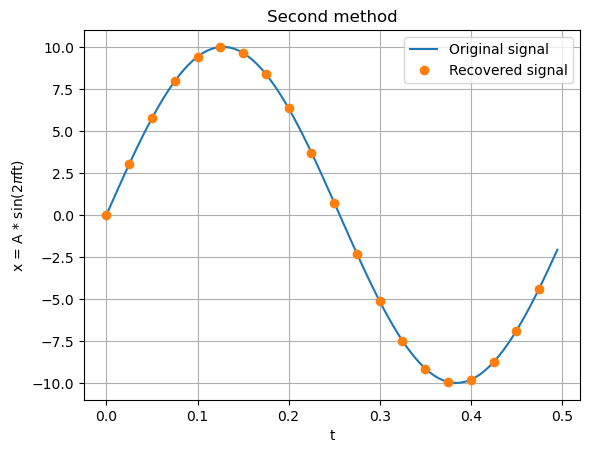

In [6]:
X = np.imag(X) + 1.0j * np.real(X)
x_hat = 1.0j / len(X) * np.conj(np.fft.fft(X))
x_hat = np.real(x_hat)
plt.figure()
plt.grid()
plt.plot(t[:100], x[:100], label = 'Original signal')
plt.plot(t[:100], x_hat[:100], 'o', label = 'Recovered signal', markevery = 5)
plt.title("Second method")
plt.xlabel("t")
plt.ylabel(r"x = A * sin(2$\pi$ft)")
plt.legend()
plt.show()

## Bit of theory behind second method

Given that $x = a + jb$, then after switching real and imaginary parts we can define $x^\prime$ = $b + ja = j\overline{x}$. Then, following the same logic as in the first method, we can derive IDFT as $x(k) = \frac{j}{N}\overline{\sum_{n = 0}^{N - 1}\overline{X^\prime(k)}e^\frac{{-j2 \pi k n}}{N}}$

Both methods are essentially identical. Which is used depends solely only on how IQ samples are stored - when they are represented as one single array in form of I + jQ, then the first method will be selected, whereas if IQ samples are stored as two separate arrays, then the second method is much more suitable.

All copyright reserved @2025 Ericsson